In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dataset_mood_smartphone.csv')
df.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [5]:
#remove index column as there already is one in the data frame
df = df.drop(['Unnamed: 0'], axis=1)

In [13]:
variables = df["variable"].unique()
len(variables)


19

In [7]:
df['time'] = pd.to_datetime(df['time'])

In [8]:
print(df['time'].dtype)

datetime64[ns]


### Exploratory analysis

In [9]:
n = len(df)
n

376912

In [10]:
missing = df.isnull().sum()
missing

id            0
time          0
variable      0
value       202
dtype: int64

In [ ]:
descriptive_stats_list = []

for i in variables:
    temp_df = df.loc[df['variable'] == i].copy()
    temp_df = temp_df.drop(['time'], axis=1)

    stats = temp_df.describe()
    median = temp_df['value'].median()
    skewness = temp_df['value'].skew()
    kurtosis = temp_df['value'].kurt()

    missing_values = temp_df.isnull().sum()
    variable_stats = {
        'Stats': stats,
        "Median": median,
        'Missing_values': missing_values,
        'Skewness': skewness,
        "Kurtosis": kurtosis

    }
    descriptive_stats_list.append((i, variable_stats))

for i, stats_data in descriptive_stats_list:
    print(f"Descriptive stats for variable {i}:")
    print(stats_data['Stats'])
    print(f"Missing values for variable {i}:")
    print(stats_data['Missing_values'])
    print(f"Skewness of  {i}:", stats_data['Skewness'])
    print(f"median of  {i}:",  stats_data['Median'])
    print("\n")


Descriptive stats for variable mood:
             value
count  5641.000000
mean      6.992555
std       1.032769
min       1.000000
25%       7.000000
50%       7.000000
75%       8.000000
max      10.000000
Missing values for variable mood:
id          0
variable    0
value       0
dtype: int64
Skewness of  mood: -0.8333525575926262
median of  mood: 7.0


Descriptive stats for variable circumplex.arousal:
             value
count  5597.000000
mean     -0.098624
std       1.051868
min      -2.000000
25%      -1.000000
50%       0.000000
75%       1.000000
max       2.000000
Missing values for variable circumplex.arousal:
id           0
variable     0
value       46
dtype: int64
Skewness of  circumplex.arousal: -0.07629620339030749
median of  circumplex.arousal: 0.0


Descriptive stats for variable circumplex.valence:
             value
count  5487.000000
mean      0.687808
std       0.671298
min      -2.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       2.000000


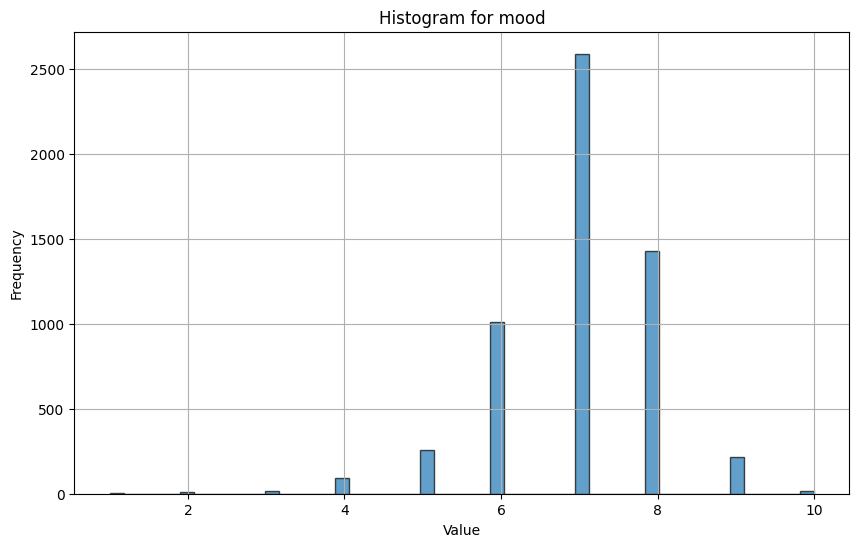

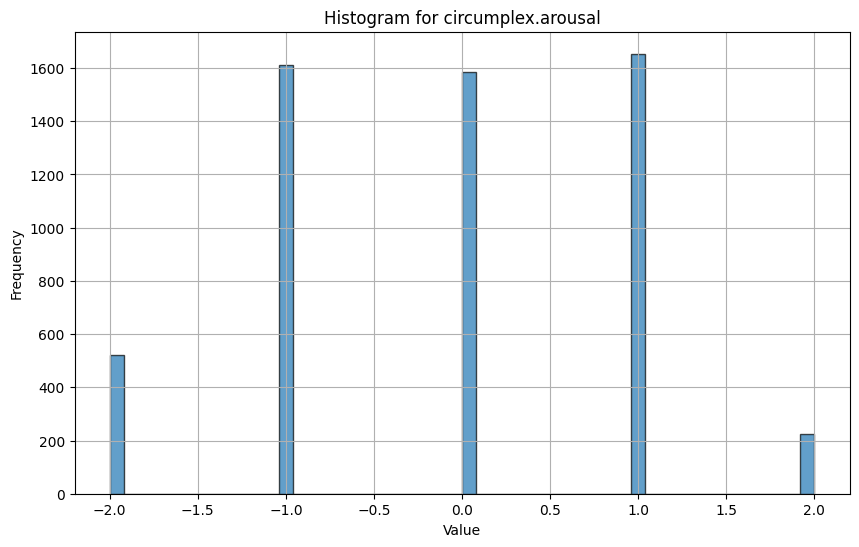

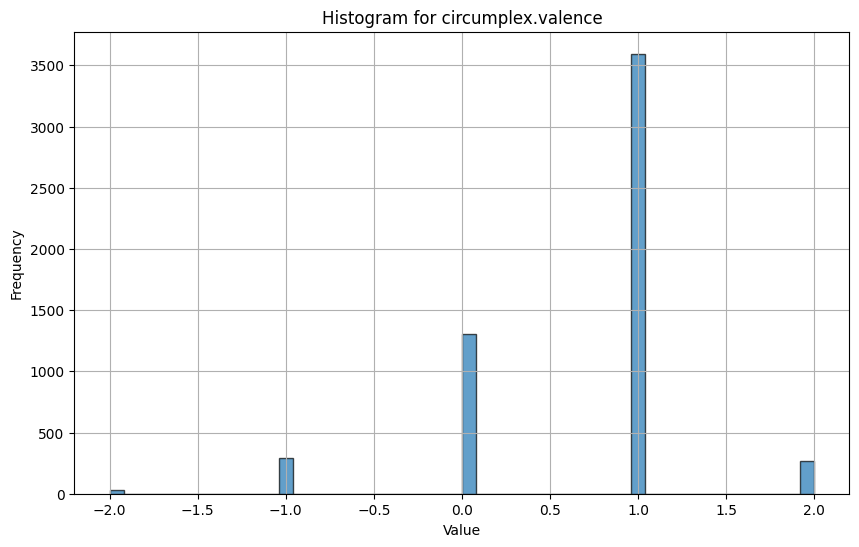

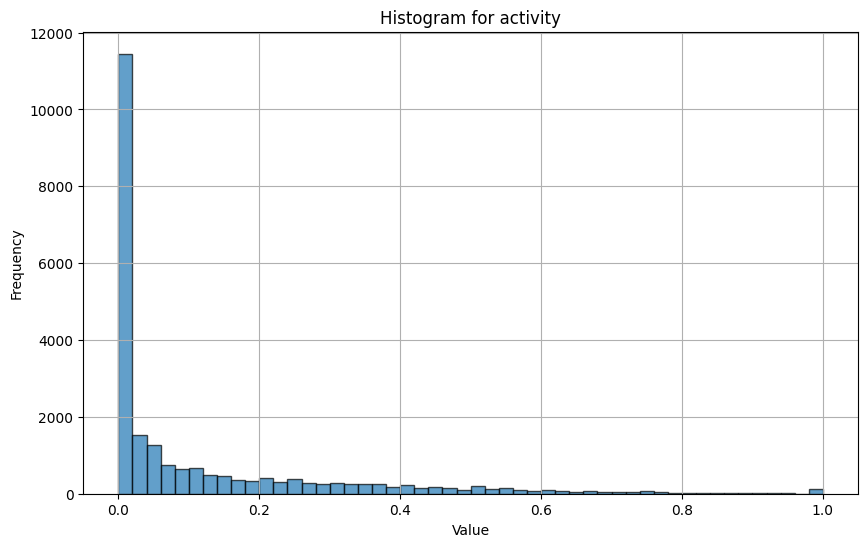

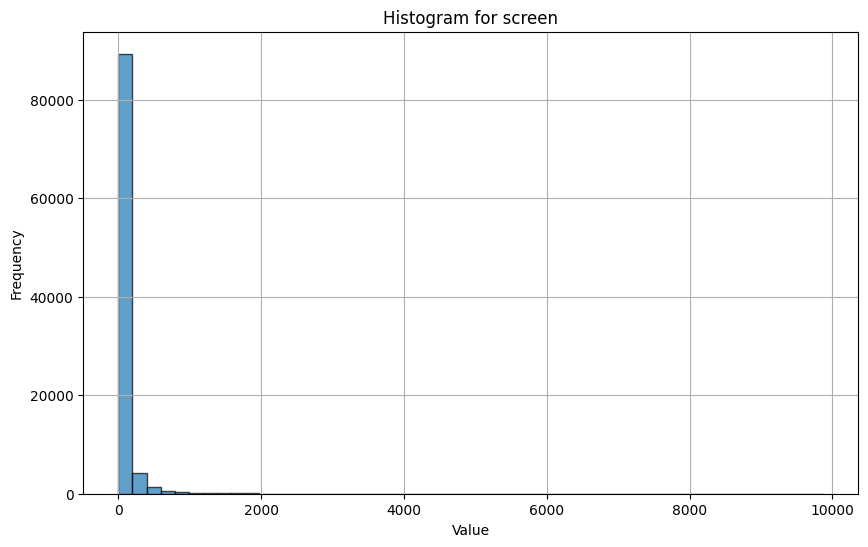

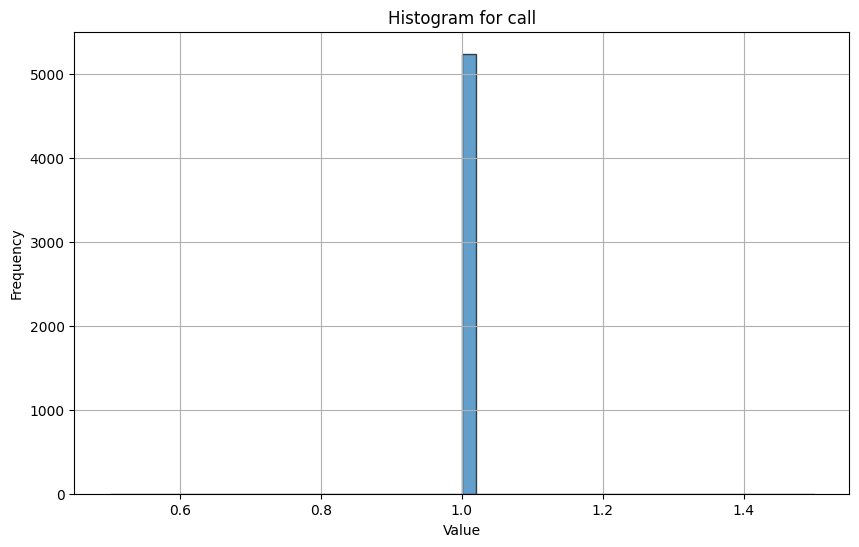

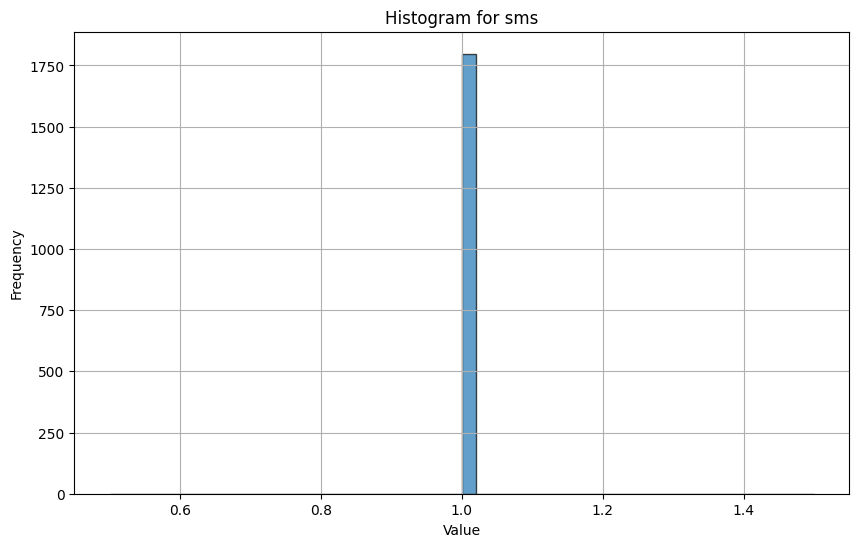

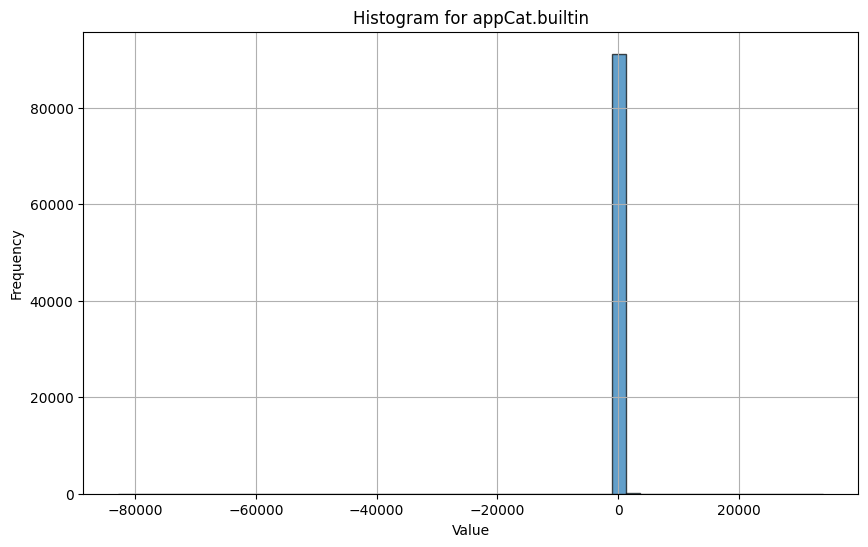

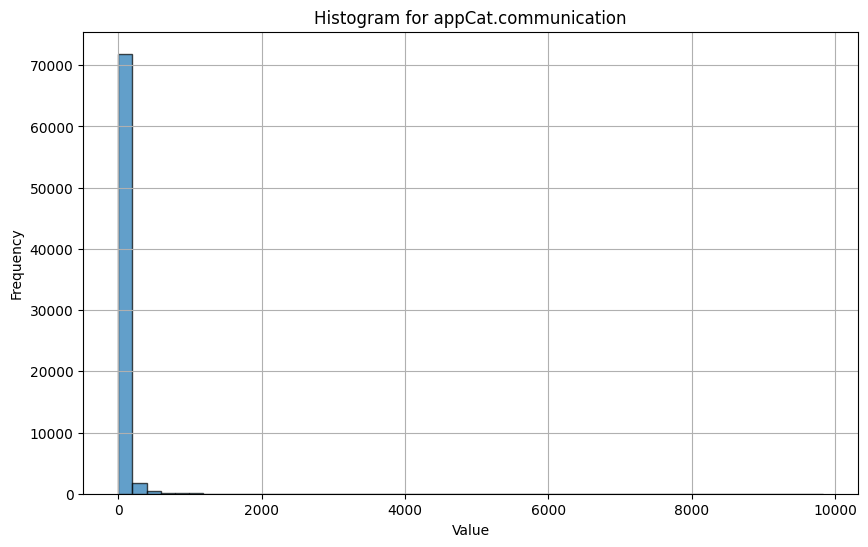

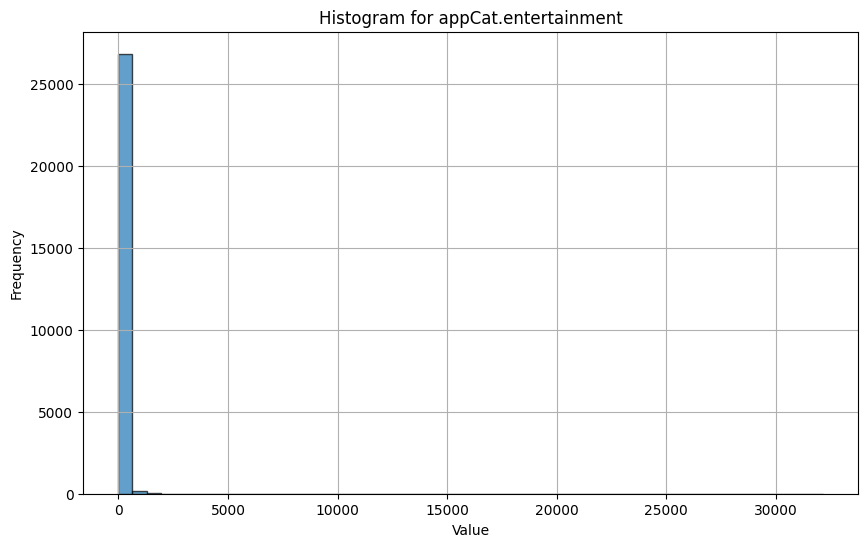

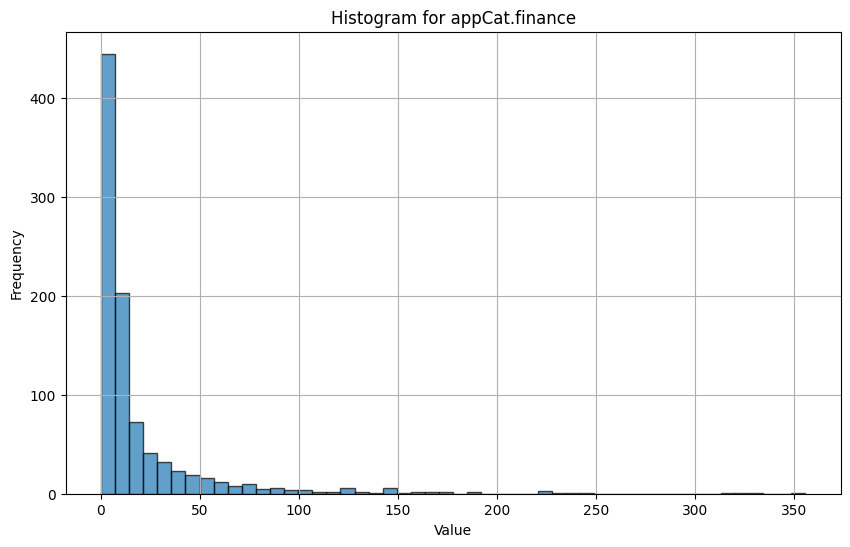

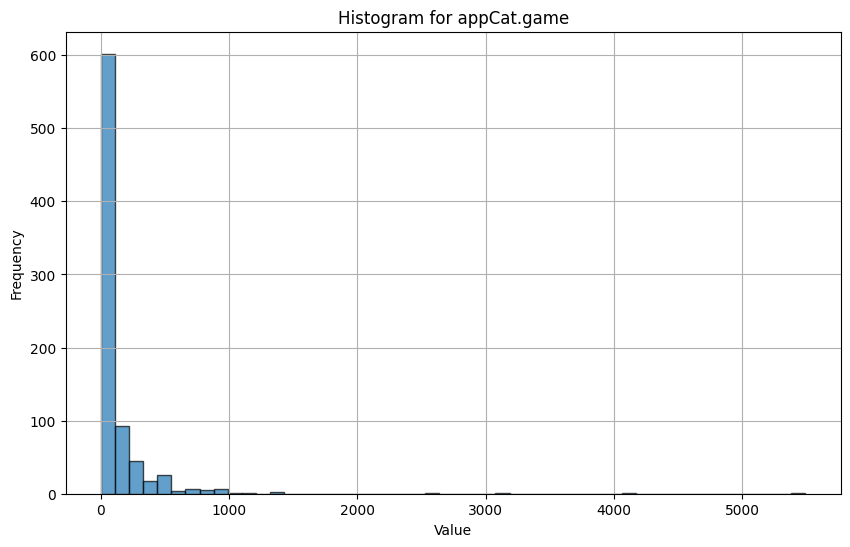

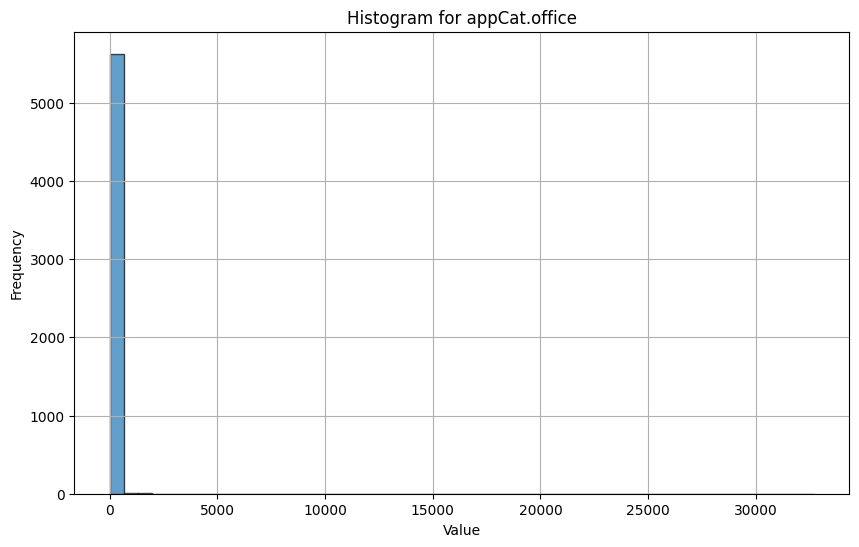

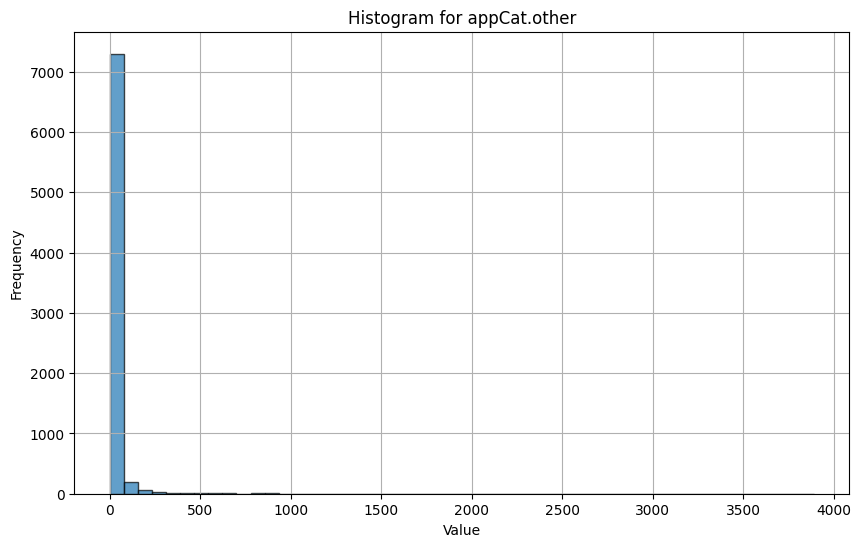

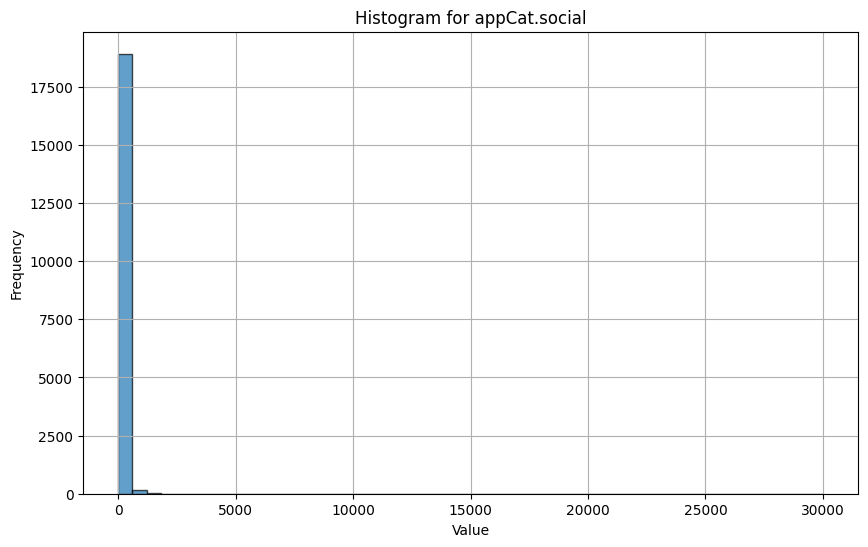

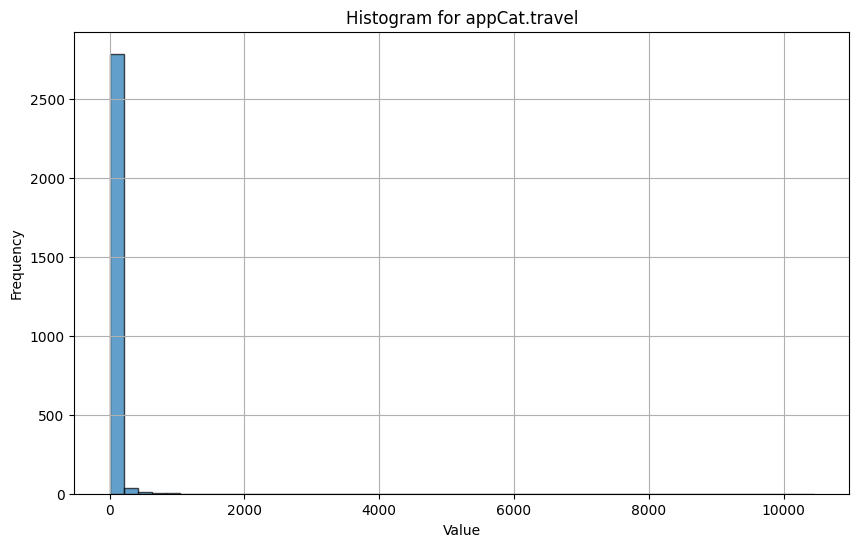

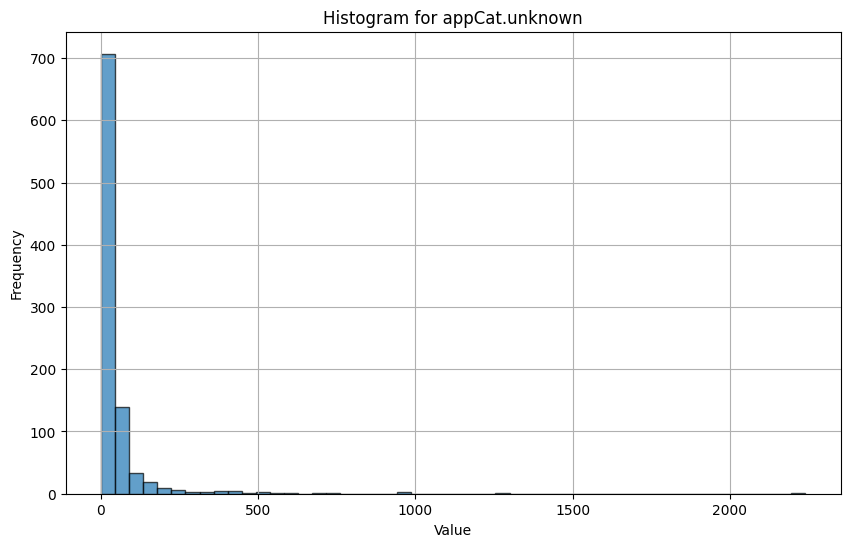

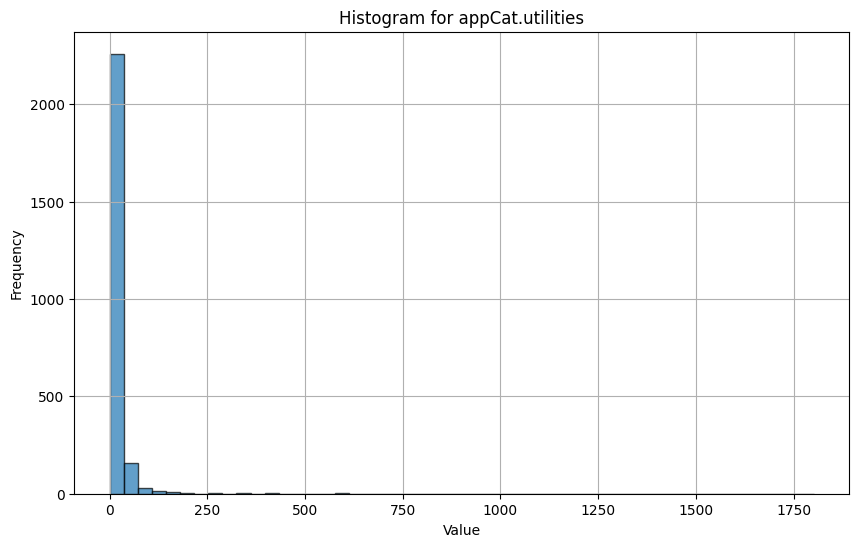

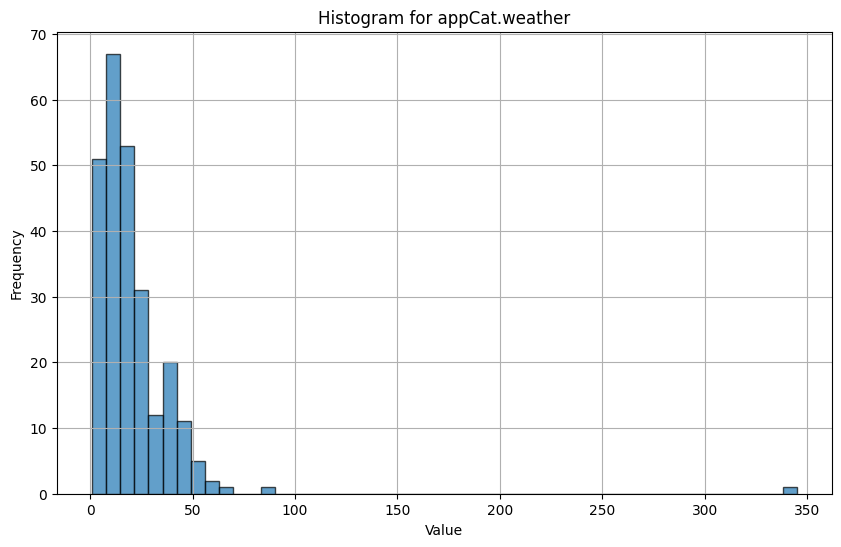

In [19]:
for i in variables:
    subset = df[df['variable'] == i]
    
    plt.figure(figsize=(10, 6))
    plt.hist(subset['value'], bins=50, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram for {i}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [ ]:
for i in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='value', data=df[df['variable'] == i])

    plt.title(f"Boxplot for {i}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


KeyError: 'variable_name'

<Figure size 1000x600 with 0 Axes>